In [1]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from model_utils import *
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.figsize": (20, 10)})

In [2]:
model = "ada_boost"

In [3]:
params = PARAMETERS[model]
regressor = MODELS[model]
normalize = NORMALIZE[model]

In [4]:
data_df = get_data(drop_columns=REMOVE, normalize=normalize)
x, y = data_df.drop(columns=["paredao", "nome", "rejeicao"], axis=1).to_numpy(), data_df.drop(columns=data_df.columns[:-1], axis=1).to_numpy()
y = np.ravel(y)

In [5]:
reg = regressor(**params)

In [6]:
preds = cross_val_predict(reg, x, y, cv=10, n_jobs=5)

In [7]:
data_df["predicao"] = preds

In [8]:
data_df["erro_absoluto"] = abs(data_df["rejeicao"] - data_df["predicao"])

In [9]:
data_df[["paredao", "nome", "rejeicao", "predicao", "erro_absoluto"]].sort_values(by="erro_absoluto")

,paredao,nome,rejeicao,predicao,erro_absoluto
30,14,gizelly_bicalho,0.5479,0.541600,0.006300
4,6,guilherme,0.5607,0.546933,0.013767
22,8,pyong,0.5170,0.531210,0.014210
9,7,babu,0.0460,0.064000,0.018000
10,7,manu_gavassi,0.1018,0.075587,0.026213
40,1,lucas_chumbo,0.7594,0.722421,0.036979
39,1,bianca_andrade,0.2446,0.202900,0.041700
12,3,felipe_prior,0.2029,0.244600,0.041700
44,11,babu,0.0411,0.084925,0.043825
2,17,thelma,0.3141,0.362800,0.048700


# Plot de real x predito

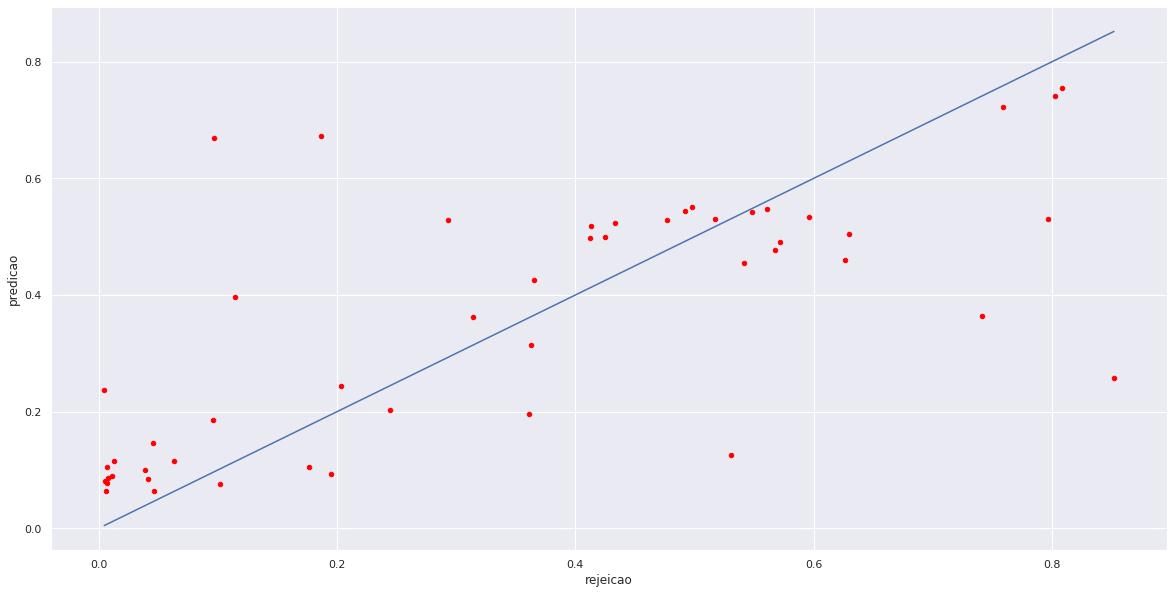

In [10]:
data_df.plot.scatter(x="rejeicao", y="predicao", c="red")
x_min, x_max = data_df["rejeicao"].min(), data_df["rejeicao"].max()
y_min, y_max = data_df["predicao"].min(), data_df["predicao"].max()
range = [min(x_min, y_min), max(x_max, y_max)]
plt.plot(range, range)

In [11]:
y_real = data_df["rejeicao"].values
pred = data_df["predicao"].values
for metric in METRICS.keys():
    print("{}: {}".format(metric, METRICS[metric](y_real, pred)))

mse: 0.03465953786404637
mae: 0.12593251797347818
r2: 0.5073373476723715


# Correlação de real x predito

In [13]:
cor = data_df[["rejeicao", "predicao"]].corr()

In [15]:
cor["rejeicao"]

rejeicao    1.000000
predicao    0.719485
Name: rejeicao, dtype: float64